In [2]:
import re
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model

data = pd.read_csv("./FA-KES-Dataset.csv", encoding='latin1')
print(data.head())

      unit_id                                      article_title  \
0  1914947530  Syria attack symptoms consistent with nerve ag...   
1  1914947532  Homs governor says U.S. attack caused deaths b...   
2  1914947533    Death toll from Aleppo bomb attack at least 112   
3  1914947534        Aleppo bomb blast kills six Syrian state TV   
4  1914947535  29 Syria Rebels Dead in Fighting for Key Alepp...   

                                     article_content source       date  \
0  Wed 05 Apr 2017 Syria attack symptoms consiste...    nna   4/5/2017   
1  Fri 07 Apr 2017 at 0914 Homs governor says U.S...    nna   4/7/2017   
2  Sun 16 Apr 2017 Death toll from Aleppo bomb at...    nna  4/16/2017   
3  Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...    nna  4/19/2017   
4  Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...    nna  7/10/2016   

  location  labels  
0    idlib       0  
1     homs       0  
2   aleppo       0  
3   aleppo       0  
4   aleppo       0  


In [4]:
print(data.isnull().sum())
X = data.drop(columns=['labels'])
Y = data['labels']

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64


In [5]:
# Define the vocabulary size for tokenization.
voc_size = 5000

# Make a copy of the dataset to avoid modifying the original DataFrame.
messages = X.copy()

# Reset index for clean sequential indexing.
messages.reset_index(inplace=True)

##########################################################################
# TODO: Download the NLTK stopwords resource needed for preprocessing.
##########################################################################
# Replace the "pass" statement with your code
nltk.download('stopwords')
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
ps = PorterStemmer()

##########################################################################
# TODO: Preprocess each text entry in `messages['article_title']` and
# construct a cleaned list of strings stored in a variable called `corpus`.
#
# Your preprocessing steps should include:
#   1. Removing all non-alphabetic characters (hint: use re.sub)
#   2. Converting text to lowercase
#   3. Splitting text into tokens
#   4. Removing English stopwords
#   5. Applying Porter stemming to each remaining token
#   6. Joining tokens back into a single string and appending to `corpus`
##########################################################################
# Replace the "pass" statement with your code
# ایجاد شیء ریشه‌یاب
corpus = []

# فرآیند تمیزکاری متون (پیش‌فرض بر روی ستون article_title یا محتوای ترکیبی)
for i in range(0, len(messages)):
    # ۱. حذف تمامی کاراکترهای غیر از حروف الفبا
    review = re.sub('[^a-zA-Z]', ' ', messages['article_title'][i])
    # ۲. کوچک‌سازی حروف
    review = review.lower()
    review = review.split()
    
    # ۳. حذف Stopwords و انجام Stemming
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################

# Display a random sample of cleaned text entries
for i in random.sample(corpus, 10):
    print(i)


eleven kill syrian regim control area aleppo
syrian armi foil takfiri attack daraa kill least gunmen lattakia
citizen kill injur terrorist attack shell damascu aleppo idleb
citizen kill injur terrorist attack shell damascu aleppo idleb
syrian armi advanc near aleppo
four kill includ two women terrorist attack aleppo quneitra
dozen dead warplan pound rebel held north syria jordan time
syria rebel kill aleppo assault captur villag monitor
syria regim advanc rebel aleppo monitor jordan time
kurdish led forc kill daesh milit northern syrian citi al tabqah


***WORD EMBEDDING***

In [7]:
##########################################################################
# TODO: Convert each preprocessed text in `corpus` into a one-hot encoded
# representation using the `one_hot` function and store the result in a
# variable named **onehot_repr**.
##########################################################################
# Replace the "pass" statement with your code
onehot_repr = [one_hot(words, voc_size) for words in corpus]
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################

# Display a random sample of one-hot encoded sequences
for i in random.sample(onehot_repr, 10):
    print(i)


[1097, 4159, 1262, 3213, 4133, 2588, 2633, 4296, 50, 2739]
[4009, 2374, 74, 3650, 1097, 4455, 4844]
[4124, 2751, 2145, 4628, 3911, 1035, 1921]
[1275, 2751, 2145, 2574, 1035, 1779, 1106, 2022, 3020]
[2374, 3161, 163, 1980, 4620, 2145, 2153]
[3938, 2145, 4791, 2374, 4901, 2113, 2869]
[831, 2374, 3496, 2869, 3467, 1447]
[1458, 3080, 2113, 2145, 4177, 1035, 2869, 2280]
[573, 162, 2145, 258, 1109, 3810, 3012, 684, 239]
[1097, 3687, 2145, 4009, 2374, 2869]


In [8]:
sent_length = 40

##########################################################################
# TODO: Pad all one-hot encoded sequences in `onehot_repr` to a fixed
# length of `sent_length` using `pad_sequences`. Store the result in a
# variable named **embedded_docs**.
##########################################################################
# Replace the "pass" statement with your code
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################

print(embedded_docs.shape)
print(embedded_docs[0])


(804, 40)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 1035 2113 4704 3708  736 1317 4081]


***DEFINING BOTH MODELS***


*   RNN
*   CNN+RNN



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam

embedding_vector_features = 100

##########################################################################
# TODO: Build a hybrid CNN + LSTM model
##########################################################################
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# کامپایل مدل با بهینه‌ساز Adam (نرخ یادگیری معمولا 0.001 یا طبق مقاله)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################

print(model.summary())

##########################################################################
# TODO: Build a pure RNN model (using LSTM layer)
##########################################################################
model_RNN = Sequential()
model_RNN.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model_RNN.add(LSTM(32))
model_RNN.add(Dense(1, activation='sigmoid'))

model_RNN.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################

print(model_RNN.summary())

d:\Uni\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


***TRAIN TEST SPLITTING***

In [13]:
print(embedded_docs.shape)
print(Y.shape)

X_final = np.array(embedded_docs)
Y_final = np.array(Y)
X_final.shape , Y_final.shape

x_train, x_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)

(804, 40)
(804,)


***HYBRID CNN+RNN TRAINING***

In [17]:
filepath = "my_best_model.keras"   # modern Keras format

# Callback to save the model that achieves the best validation accuracy
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

callbacks = [checkpoint]

##########################################################################
# TODO: Train the model using the appropriate hyperparameters based on 
# the paper you are following. Use:
#   - (x_train, y_train) as training data
#   - (x_test, y_test) as validation data
#   - the callback list defined above
#
# Store the training output in a variable named **history**.
#
# NOTE: You must determine the correct training hyperparameters (epochs,
# batch size, optimizer settings, etc.) from the referenced paper.
##########################################################################
# Replace the "pass" statement with your code
# بر اساس مقاله، پارامترهای زیر برای آموزش مدل Hybrid پیشنهاد می‌شود:
history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=15, 
    batch_size=64, 
    callbacks=callbacks,
    verbose=1
)
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4925 - loss: 0.6952
Epoch 1: val_accuracy improved from None to 0.55639, saving model to my_best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5000 - loss: 0.6941 - val_accuracy: 0.5564 - val_loss: 0.6899
Epoch 2/15
5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4964 - loss: 0.6895
Epoch 2: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5186 - loss: 0.6854 - val_accuracy: 0.5564 - val_loss: 0.6886
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5428 - loss: 0.6747
Epoch 3: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5260 - loss: 0.6765 - val_accuracy: 0.5451 - val_loss: 0.6900
Epoch 4/15
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6605 - loss: 0.6592
Epoch 4: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7100 - loss: 0.6526 - val_accura

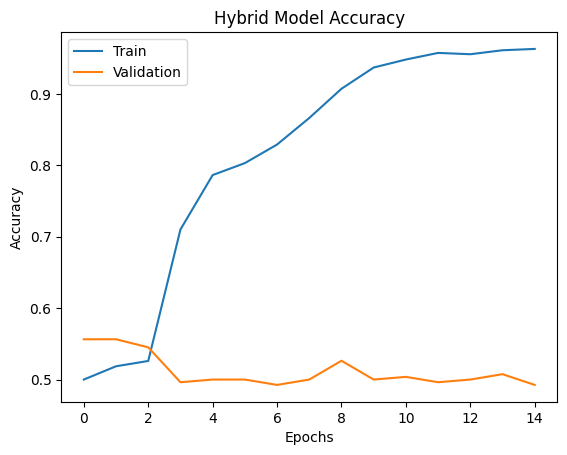

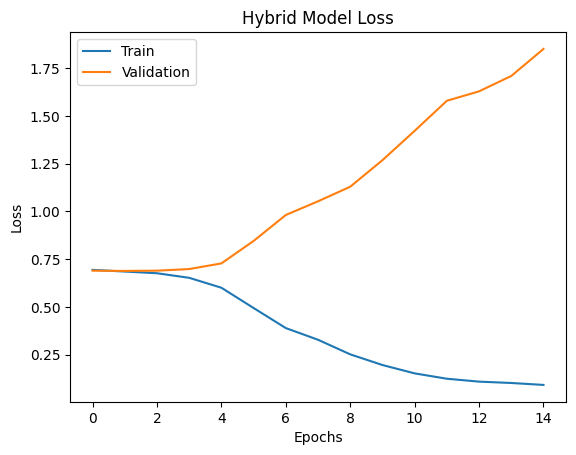

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


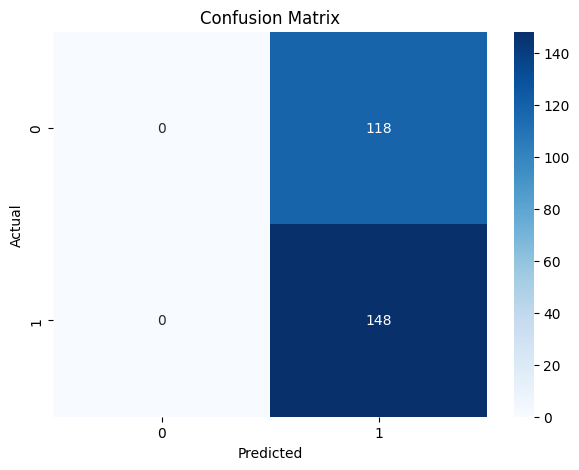

Accuracy: 55.639097744360896


In [18]:
# -----------------------------
# Plot Accuracy
# -----------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Hybrid Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# -----------------------------
# Plot Loss
# -----------------------------
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Hybrid Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# -----------------------------
# Load Best Saved Model
# -----------------------------
model = load_model("my_best_model.keras")

# -----------------------------
# Predict on Test Data
# -----------------------------
preds = model.predict(x_test)
Y_pred = (preds >= 0.5).astype(int).reshape(-1)

# -----------------------------
# Confusion Matrix
# -----------------------------
df_cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# -----------------------------
# Accuracy Score
# -----------------------------
print("Accuracy:", accuracy_score(y_test, Y_pred) * 100)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.56      1.00      0.71       148

    accuracy                           0.56       266
   macro avg       0.28      0.50      0.36       266
weighted avg       0.31      0.56      0.40       266



***RNN TRAINING***

In [20]:
filepath = "my_best_model_RNN.keras"   # modern format

# Callback to save the RNN model achieving the best validation accuracy
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

callbacks = [checkpoint]

##########################################################################
# TODO: Train the RNN model (model_RNN) using the appropriate 
# hyperparameters based on the paper.
#
# Use:
#   - (x_train, y_train) as the training set
#   - (x_test, y_test) as the validation set
#   - the callbacks defined above
#
# Store the training output in a variable named **history_RNN**.
#
# NOTE: You must determine all hyperparameters (epochs, batch size, 
# optimizer config, etc.) from the referenced paper.
##########################################################################
# Replace the "pass" statement with your code
# استفاده از داده‌های x_train و y_train برای آموزش
# و x_test و y_test برای اعتبارسنجی (Validation)
history_RNN = model_RNN.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=64, 
    callbacks=callbacks,
    verbose=1
)
##########################################################################
#                           END OF YOUR CODE                             #
##########################################################################


Epoch 1/20
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4783 - loss: 0.6932
Epoch 1: val_accuracy improved from None to 0.55639, saving model to my_best_model_RNN.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4888 - loss: 0.6937 - val_accuracy: 0.5564 - val_loss: 0.6909
Epoch 2/20
5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5466 - loss: 0.6889
Epoch 2: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5446 - loss: 0.6891 - val_accuracy: 0.5526 - val_loss: 0.6912
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6063 - loss: 0.6846
Epoch 3: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6134 - loss: 0.6846 - val_accuracy: 0.5226 - val_loss: 0.6914
Epoch 4/20
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7028 - loss: 0.6791
Epoch 4: val_accuracy did not improve from 0.55639
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6952 - loss: 0.6762 - val_ac

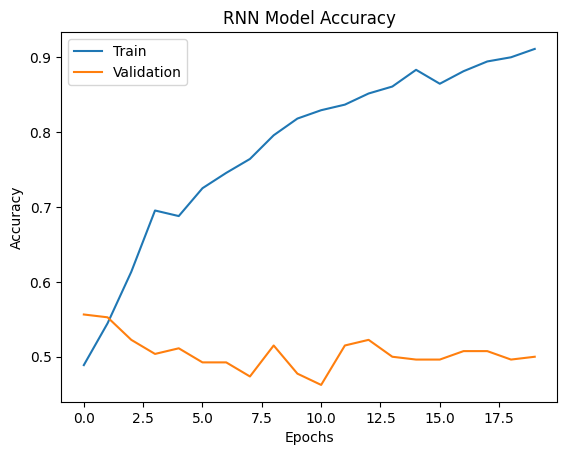

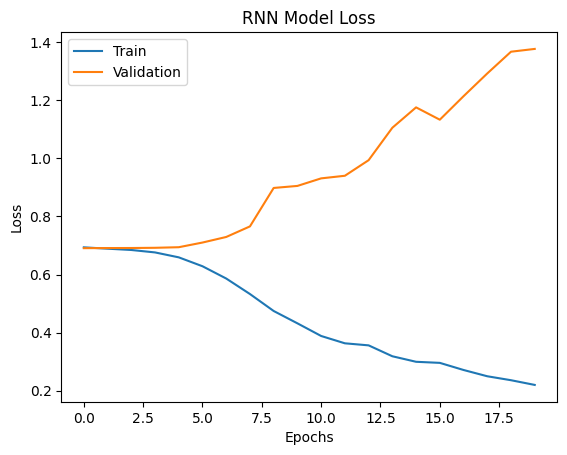

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


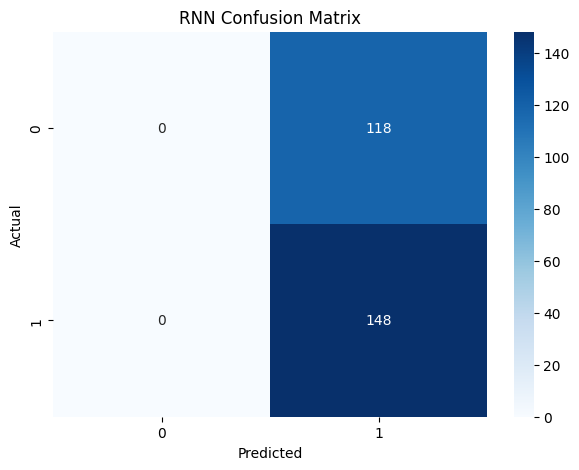

Accuracy: 55.639097744360896


In [21]:
# ============================
#   RNN MODEL EVALUATION
# ============================

# ---- Plot Accuracy ----
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ---- Plot Loss ----
plt.figure()
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ---- Load Best Saved RNN Model ----
model = load_model('my_best_model_RNN.keras')

# ---- Predict ----
preds = model.predict(x_test)

Y_pred = (preds >= 0.5).astype(int).reshape(-1)

# ---- Confusion Matrix ----
df_cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Accuracy:', accuracy_score(y_test, Y_pred) * 100)


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.56      1.00      0.71       148

    accuracy                           0.56       266
   macro avg       0.28      0.50      0.36       266
weighted avg       0.31      0.56      0.40       266

